In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from simulations import simulate_draw
from multiprocessing import Pool, cpu_count
import time
from collections import defaultdict
import csv
from collections import Counter
import signal
import random

In [2]:
# Defining the basic function that simulates the process of drawing and replacing
def simulate_draw(dummy):
    papers = list(range(1, 2025))  # Using a list for compatibility with random.sample
    while len(papers) > 1:
        a, b = random.sample(papers, 2)
        papers.remove(a)
        papers.remove(b)
        papers.append(abs(a - b))  # Keep the operation simple; allow 0 as a result
    return papers[0] if papers else 0  # Return the final number or 0 if the list is empty


In [3]:
#Simulation function
def simulate_chunk(pool, chunk_size):
    # Simulate a chunk of simulations and measure the time taken
    start_time = time.time()
    final_numbers = pool.map(simulate_draw, [None] * chunk_size)
    end_time = time.time()
    duration = end_time - start_time  # Calculate the duration for this chunk
    return final_numbers, duration


In [4]:
#Defining a function that run th simulation for any n.
def simulate(n):
    numbers = list(range(1, n + 1))
    while len(numbers) > 1:
        a, b = random.sample(numbers, 2)
        numbers.remove(a)
        numbers.remove(b)
        diff = abs(a - b)

        numbers.append(diff)
    return numbers[0]

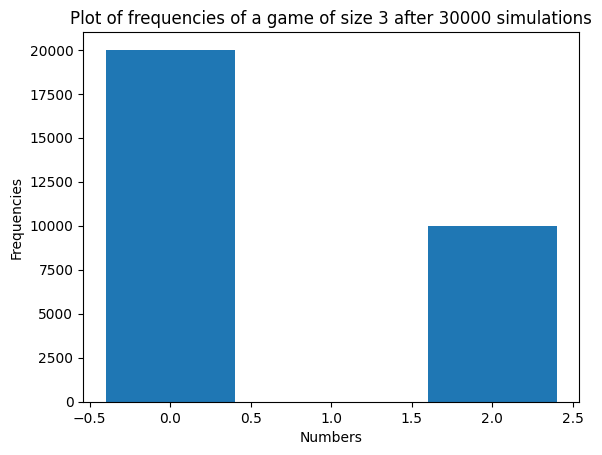

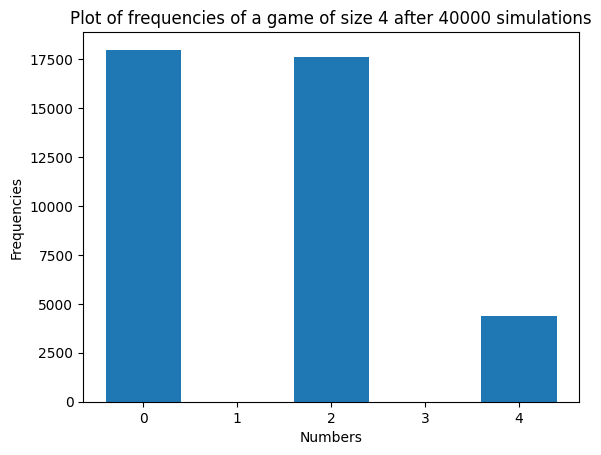

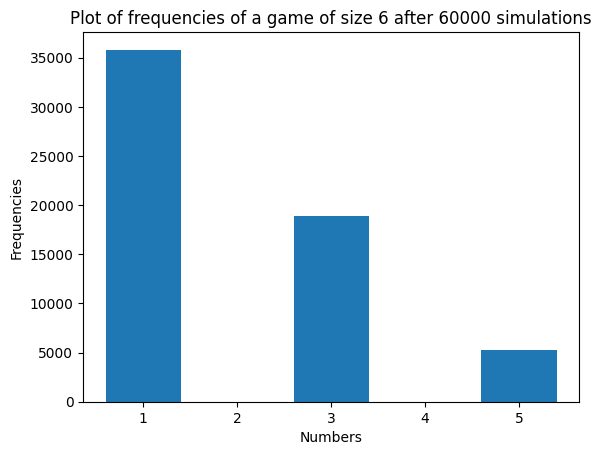

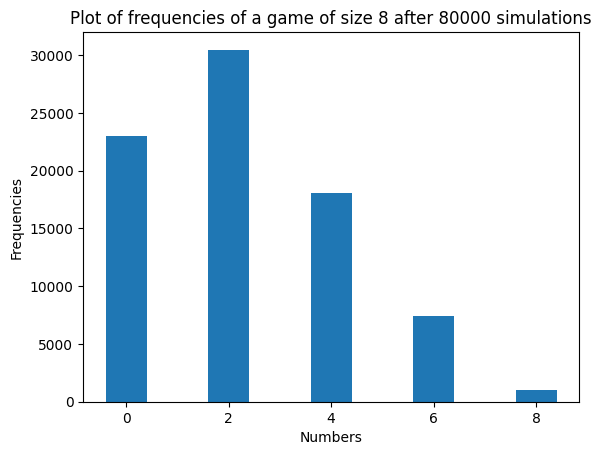

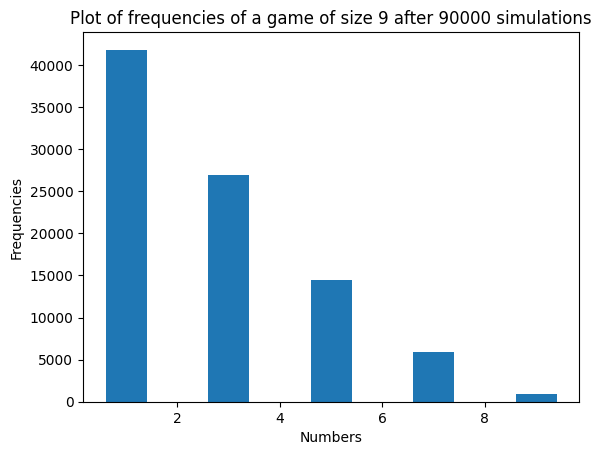

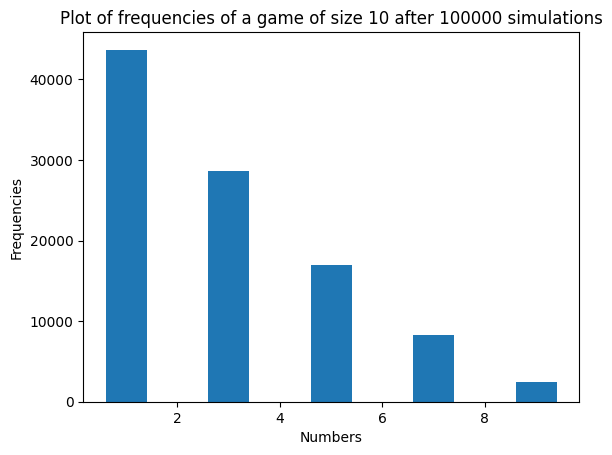

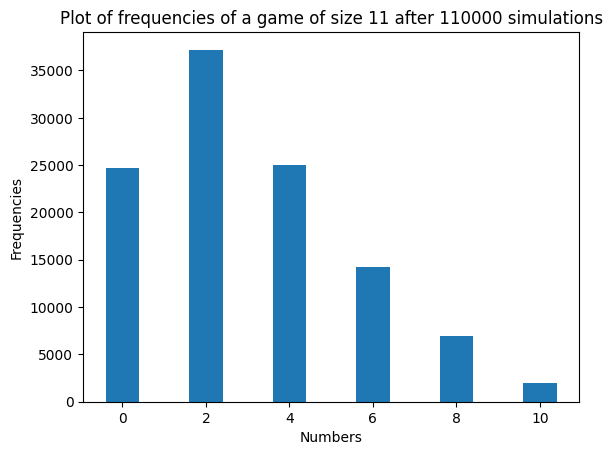

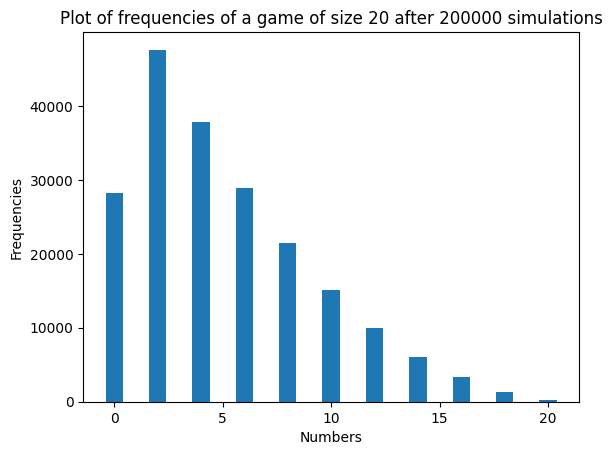

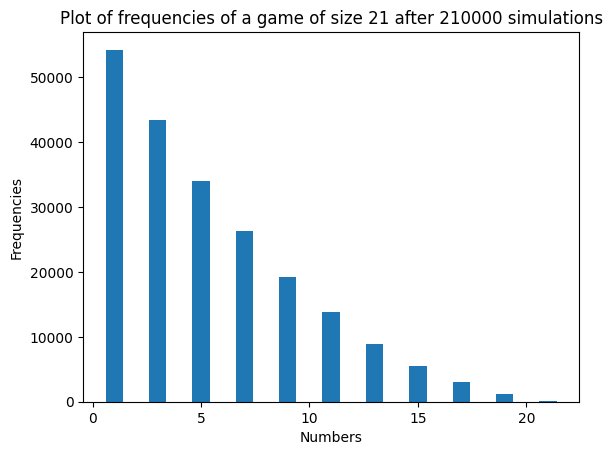

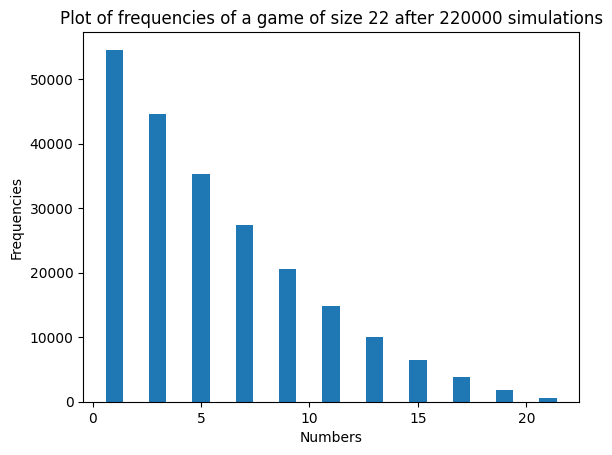

In [7]:
l = [3,4,6,8,9,10,11,20,21,22]

for i in range(len(l)):
    n = l[i]
    k = l[i] * 10000

    # Read the CSV file into a DataFrame
    df = pd.read_csv(f'simulation_results_{n}.csv')

    # Extract the first and second columns
    x = df.iloc[:, 0]  # Assuming the first column is X-axis values
    y = df.iloc[:, 1]  # Assuming the second column is Y-axis values

    # Plot the data
    plt.bar(x, y)

    # Add labels and title
    plt.xlabel('Numbers')
    plt.ylabel('Frequencies')
    plt.title(f'Plot of frequencies of a game of size {n} after {k} simulations')

    # Save the plot
    plt.savefig(f'plot_{n}.png')

    # Show the plot
    plt.show()

   Final Number  Frequency  Probabilities
0             0      31047       0.002549
1             2      61536       0.005052
2             4      60837       0.004995
3             6      60740       0.004987
4             8      60992       0.005008


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


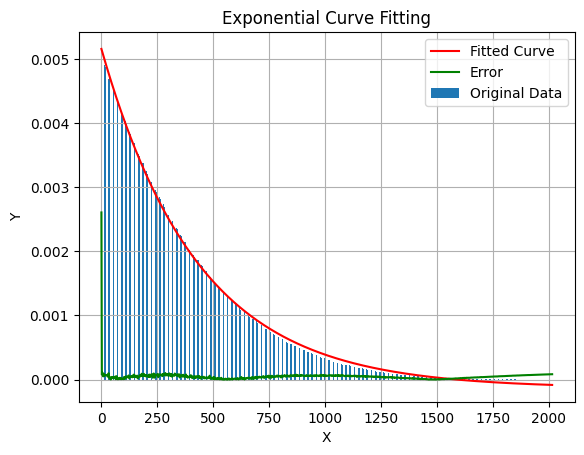

In [9]:
df = pd.read_csv('big_data.csv')

norm_coeff = df['Frequency'].sum()

df["Probabilities"] = df['Frequency'] / norm_coeff

print(df.head())

x_data = np.array(df["Final Number"].values)
y_data = np.array(df["Probabilities"].values)


def exponential_func(x, a, b, c, d):
    return a * np.exp((x*b)) +d


x_scaled = x_data
y_scaled = y_data

# Provide initial guesses for parameters
initial_guesses = [0.005, -0.002, 0, -0.0001]  # Adjust these values as per your expectation

# Perform curve fitting
popt = curve_fit(exponential_func, x_scaled, y_scaled, p0=initial_guesses)

a_opt, b_opt, c_opt, d_opt = popt

# Generate points for the fitted curve
x_fit = x_data
y_fit = exponential_func(x_fit, a_opt, b_opt, c_opt, d_opt)

y_error = abs(y_fit - y_data)


plt.bar(x_data, y_data, label='Original Data')
plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')
plt.plot(x_data, y_error, 'g-', label = 'Error')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Exponential Curve Fitting')
plt.legend()
plt.grid(True)
plt.savefig("Exponential_fittings_error_c.png")
plt.show()

In [10]:
print("Optimized parameters (a, b, c, d):", (a_opt, b_opt, c_opt, d_opt))

Optimized parameters (a, b, c, d): (0.005287189933293048, -0.0023151606145229995, 0.0, -0.000133010908449868)


In [11]:
print("total error:", y_error.sum())

total error: 0.04587334570736476


In [12]:
error_0 = y_error[1:]
print("max error for x without considering 0:", max(error_0))

max error for x without considering 0: 0.00011061467821529315


In [13]:
print("error at 0:", y_error[0])
print("max error:", y_error.max())

error at 0: 0.0026051642465180574
max error: 0.0026051642465180574


In [14]:
# Calculate relative error
rel_error = y_error / y_data
print("max relative error:", rel_error.max())

max relative error: 1015.9245094750686


In [15]:
print(df.iloc[795:, 1].sum())

13600
